In [3]:
#PASO 0. INSTALACION DE LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
#Librerías relacionadas a la red
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras

In [6]:
def DescomponerSerie(serie, longitud):
    global X, y
    X, y = list(), list()
    for i in range(len(serie)):
        final = i + longitud
        if final > len(serie) - 1:
            break
        historia_x, target_y = serie[i:final], serie[final]
        X.append(historia_x)
        y.append(target_y)
    return np.array(X), np.array(y)

In [12]:
PP = pd.read_csv("C:/Users/clau_/OneDrive/Documentos/FCFM/03_Tetramestre/Aprendizaje_Profundo/Clase 03/PrecioPetroleoDEF.csv",sep=";")
display(PP)

,Fecha,Mezcla_Mexicana
0,03/01/2005,31.42
1,04/01/2005,32.77
2,05/01/2005,32.64
3,06/01/2005,33.95
4,07/01/2005,34.15
...,...,...
4092,22/02/2021,60.10
4093,23/02/2021,60.53
4094,24/02/2021,61.85
4095,25/02/2021,62.23


In [14]:
PP["Fecha"] = pd.to_datetime(PP["Fecha"], format = "%d/%m/%Y")
PP=pd.DataFrame(PP)
PP.head()

,Fecha,Mezcla_Mexicana
0,2005-01-03,31.42
1,2005-01-04,32.77
2,2005-01-05,32.64
3,2005-01-06,33.95
4,2005-01-07,34.15


<Axes: xlabel='Fecha'>

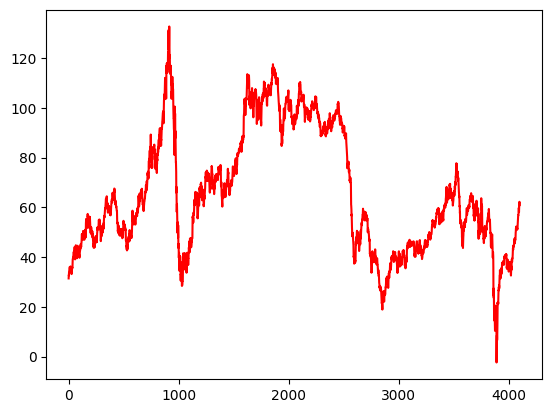

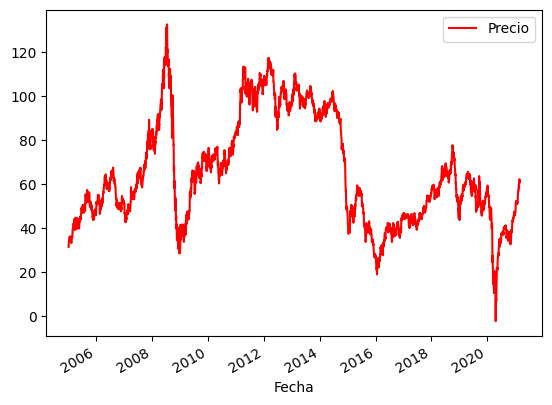

In [15]:
PP.columns=["Fecha","Precio"]
plt.plot(PP["Precio"],color="red")
PP.plot(x="Fecha", y="Precio",color="red")

In [16]:
SecuenciaPrecios = list(PP["Precio"])
print(SecuenciaPrecios)

[31.42, 32.77, 32.64, 33.95, 34.15, 34.35, 34.6, 34.75, 35.69, 35.99, 35.95, 35.85, 34.62, 34.08, 35.34, 35.75, 36.21, 36.26, 36.14, 35.05, 35.39, 35.09, 34.38, 34.24, 34.55, 33.34, 33.17, 33.17, 34.41, 34.9, 35.13, 35.18, 36.02, 35.52, 36.1, 36.27, 38.02, 39.1, 39.25, 39.58, 39.79, 39.53, 40.33, 41.17, 41.23, 41.42, 42.12, 42.0, 41.48, 41.95, 42.18, 42.26, 43.28, 43.47, 44.04, 43.82, 43.18, 39.09, 39.09, 39.09, 41.03, 41.31, 40.97, 42.26, 44.67, 44.71, 44.09, 44.55, 43.32, 43.28, 43.35, 41.28, 40.22, 40.63, 40.47, 39.53, 40.9, 41.54, 42.68, 43.53, 43.23, 44.56, 42.54, 42.58, 40.93, 41.9, 41.23, 42.16, 42.48, 42.62, 43.87, 43.82, 42.99, 41.49, 40.48, 40.52, 40.95, 40.08, 39.74, 40.12, 41.06, 41.5, 42.13, 42.37, 42.95, 43.05, 43.08, 44.4, 44.16, 45.27, 45.27, 44.6, 43.76, 44.48, 44.24, 45.55, 45.69, 45.93, 46.75, 48.53, 49.23, 49.09, 48.5, 49.04, 49.11, 49.33, 48.93, 47.39, 46.94, 48.75, 48.42, 49.14, 50.43, 50.15, 49.8, 49.18, 50.49, 49.85, 48.04, 48.35, 47.48, 47.55, 46.95, 47.04, 47.

In [17]:
DescomponerSerie(SecuenciaPrecios, 3)

(array([[31.42, 32.77, 32.64],
        [32.77, 32.64, 33.95],
        [32.64, 33.95, 34.15],
        ...,
        [58.07, 60.1 , 60.53],
        [60.1 , 60.53, 61.85],
        [60.53, 61.85, 62.23]]),
 array([33.95, 34.15, 34.35, ..., 61.85, 62.23, 60.89]))

In [18]:
for i in range(len(X)):
    print(X[i], y[i])

[31.42, 32.77, 32.64] 33.95
[32.77, 32.64, 33.95] 34.15
[32.64, 33.95, 34.15] 34.35
[33.95, 34.15, 34.35] 34.6
[34.15, 34.35, 34.6] 34.75
[34.35, 34.6, 34.75] 35.69
[34.6, 34.75, 35.69] 35.99
[34.75, 35.69, 35.99] 35.95
[35.69, 35.99, 35.95] 35.85
[35.99, 35.95, 35.85] 34.62
[35.95, 35.85, 34.62] 34.08
[35.85, 34.62, 34.08] 35.34
[34.62, 34.08, 35.34] 35.75
[34.08, 35.34, 35.75] 36.21
[35.34, 35.75, 36.21] 36.26
[35.75, 36.21, 36.26] 36.14
[36.21, 36.26, 36.14] 35.05
[36.26, 36.14, 35.05] 35.39
[36.14, 35.05, 35.39] 35.09
[35.05, 35.39, 35.09] 34.38
[35.39, 35.09, 34.38] 34.24
[35.09, 34.38, 34.24] 34.55
[34.38, 34.24, 34.55] 33.34
[34.24, 34.55, 33.34] 33.17
[34.55, 33.34, 33.17] 33.17
[33.34, 33.17, 33.17] 34.41
[33.17, 33.17, 34.41] 34.9
[33.17, 34.41, 34.9] 35.13
[34.41, 34.9, 35.13] 35.18
[34.9, 35.13, 35.18] 36.02
[35.13, 35.18, 36.02] 35.52
[35.18, 36.02, 35.52] 36.1
[36.02, 35.52, 36.1] 36.27
[35.52, 36.1, 36.27] 38.02
[36.1, 36.27, 38.02] 39.1
[36.27, 38.02, 39.1] 39.25
[38.02

In [20]:
#DEFINE LA TAZA DE APRENDIZAJE ÓPTIMA
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer._decayed_lr(tf.float32)
    return lr

In [21]:
model = Sequential()
model.add(Dense(5, input_dim = 3, activation = 'relu'))
model.add(Dense(1))

In [23]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [24]:
model.compile(loss="mean_squared_error", optimizer=opt, metrics=["accuracy"])

In [25]:
model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100


410/410 [==============================] - 2s 2ms/step - loss: 1973.4702 - accuracy: 0.0000e+00
Epoch 2/100
410/410 [==============================] - 1s 2ms/step - loss: 5.4814 - accuracy: 0.0000e+00
Epoch 3/100
410/410 [==============================] - 1s 2ms/step - loss: 2.6190 - accuracy: 0.0000e+00
Epoch 4/100
410/410 [==============================] - 1s 2ms/step - loss: 2.6026 - accuracy: 0.0000e+00
Epoch 5/100
410/410 [==============================] - 2s 4ms/step - loss: 2.5928 - accuracy: 0.0000e+00
Epoch 6/100
410/410 [==============================] - 2s 4ms/step - loss: 2.5857 - accuracy: 0.0000e+00
Epoch 7/100
410/410 [==============================] - 1s 2ms/step - loss: 2.5830 - accuracy: 0.0000e+00
Epoch 8/100
410/410 [==============================] - 1s 2ms/step - loss: 2.5781 - accuracy: 0.0000e+00
Epoch 9/100
410/410 [==============================] - 1s 2ms/step - loss: 2.5752 - accuracy: 0.0000e+00
Epoch 10/100
410/410 [============================

In [27]:
predictions = model.predict(X)
print("predictions shape:", predictions)

Generate predictions for 3 samples
128/128 [==============================] - 0s 1ms/step
predictions shape: [[32.847595]
 [33.39446 ]
 [34.240425]
 ...
 [60.48991 ]
 [61.17763 ]
 [62.02775 ]]


In [28]:
Predictions = pd.DataFrame(predictions)
Predictions.columns = ["Predictions"]
Predictions.head()

,Predictions
0,32.847595
1,33.394459
2,34.240425
3,34.185688
4,34.419128


In [29]:
Real = pd.DataFrame(y)
Real.columns = ["Real"]
Real.head()

,Real
0,33.95
1,34.15
2,34.35
3,34.60
4,34.75


In [30]:
RealPredictions = pd.concat([Predictions, Real], axis = 1)
RealPredictions = pd.DataFrame(RealPredictions)
RealPredictions

,Predictions,Real
0,32.847595,33.95
1,33.394459,34.15
2,34.240425,34.35
3,34.185688,34.60
4,34.419128,34.75
...,...,...
4089,58.003891,60.10
4090,58.837276,60.53
4091,60.489910,61.85
4092,61.177631,62.23


<Axes: >

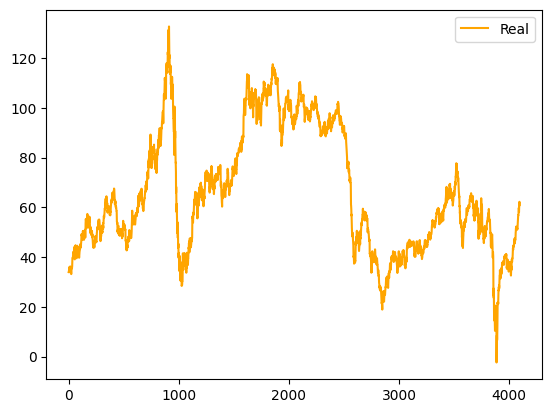

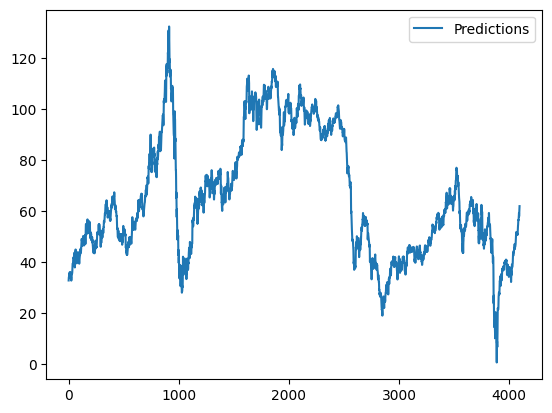

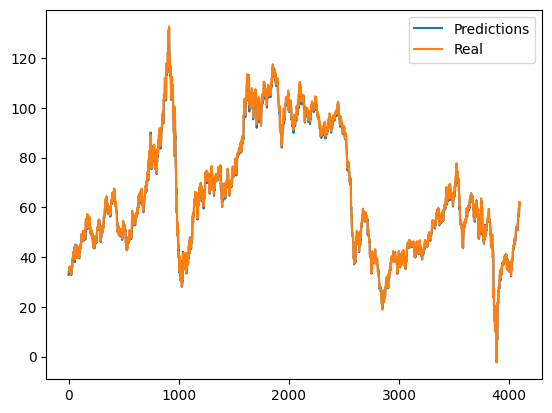

In [31]:
RealPredictions.plot(y=['Real'], color = 'orange')
RealPredictions.plot(y=['Predictions'])
RealPredictions.plot(y=['Predictions', 'Real'])